In [25]:
#%%capture
%run '3_DataCleaning.ipynb'

bank_account_Yes
False    20212
True      3312
Name: count, dtype: int64

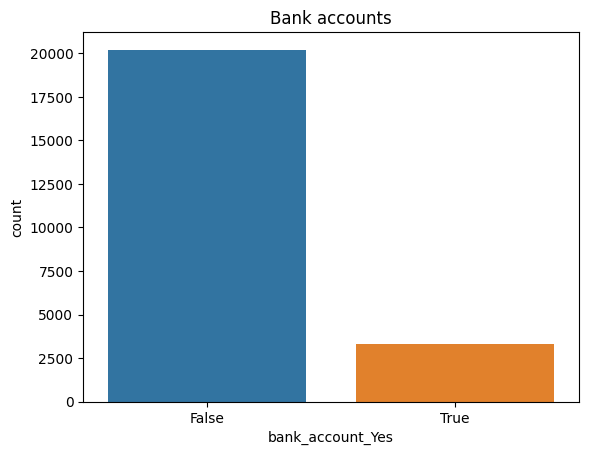

In [19]:
# Check for imbalance on target value:
display (df_cleaned.bank_account_Yes.value_counts())

# --> we have a highly imbalanced dataset, which should be somehow handeled!

# Plotting the target variable
plt.title('Bank accounts')
sns.countplot(x=df_cleaned.bank_account_Yes);

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


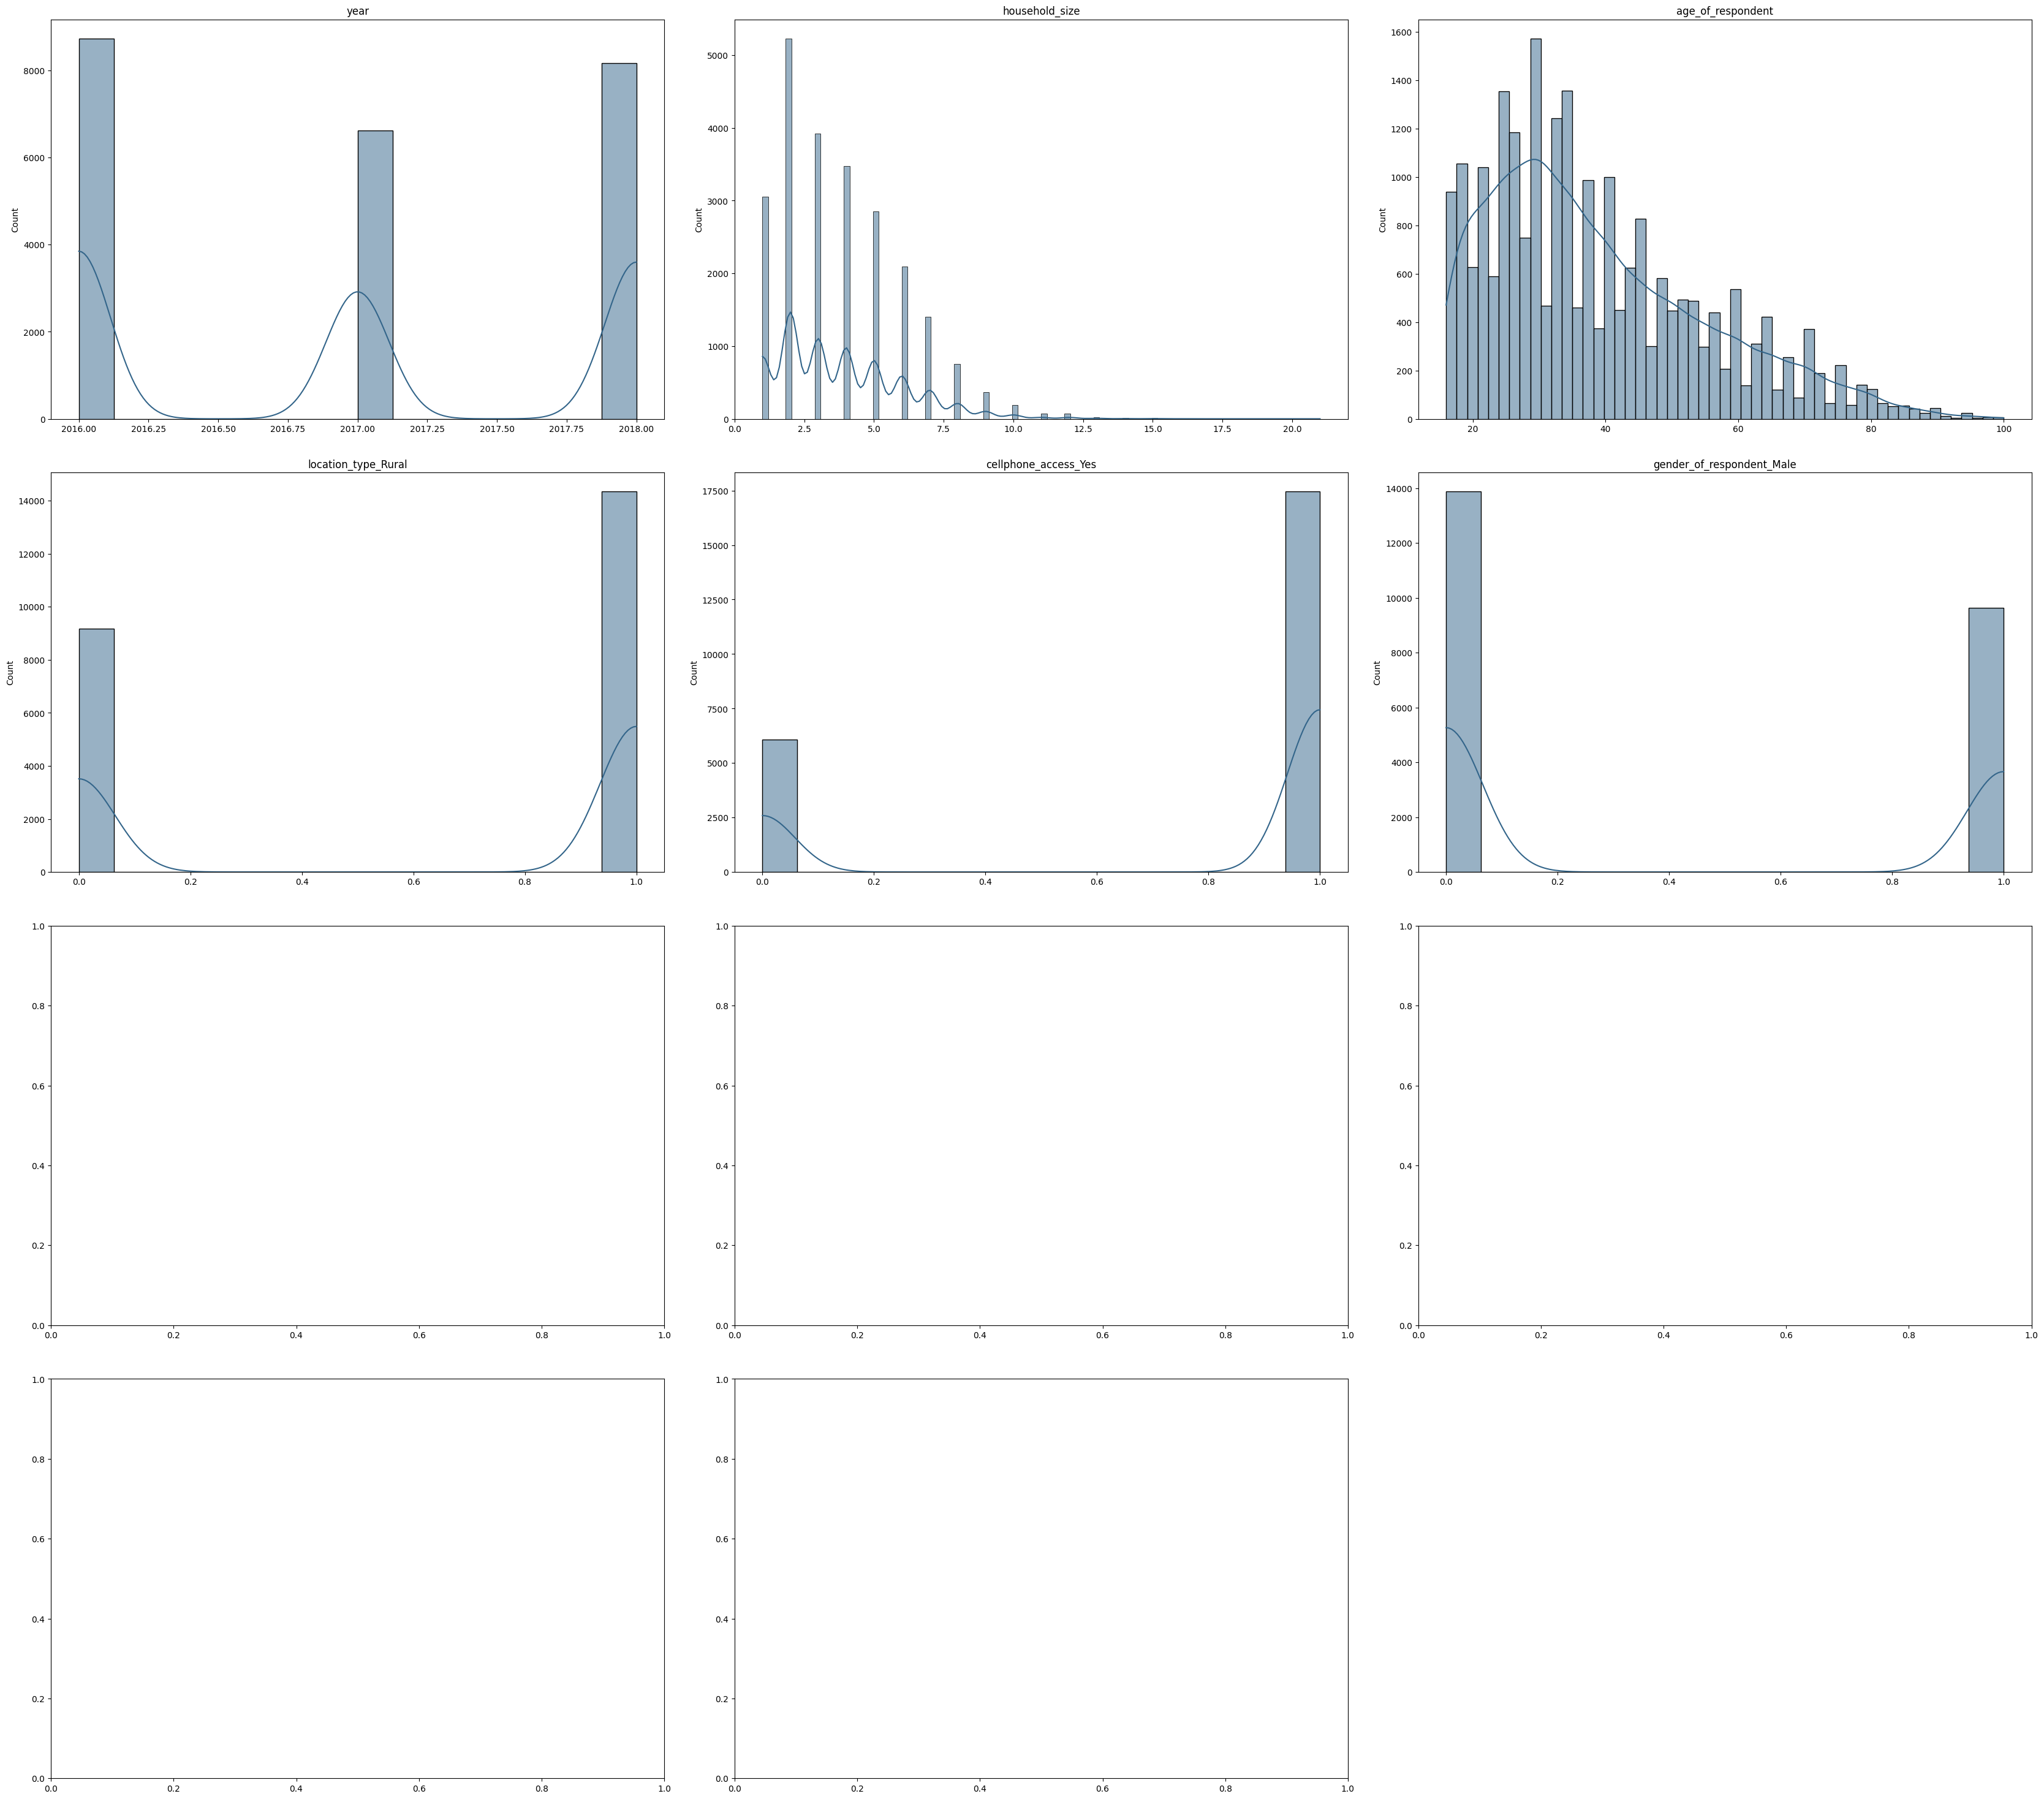

In [20]:
# Plot distribution of features 
features = df_cleaned.columns.tolist()
features.remove('bank_account_Yes')

fig,ax = plt.subplots(4,3,figsize=(34,30))
count = 0
for item in features:
    sns.histplot(df_cleaned[item], kde=True, ax=ax[int(count/3)][count%3], color='#33658A').set(title=item, xlabel='')
    count += 1
ax.flat[-1].set_visible(False)
fig.tight_layout(pad=3)

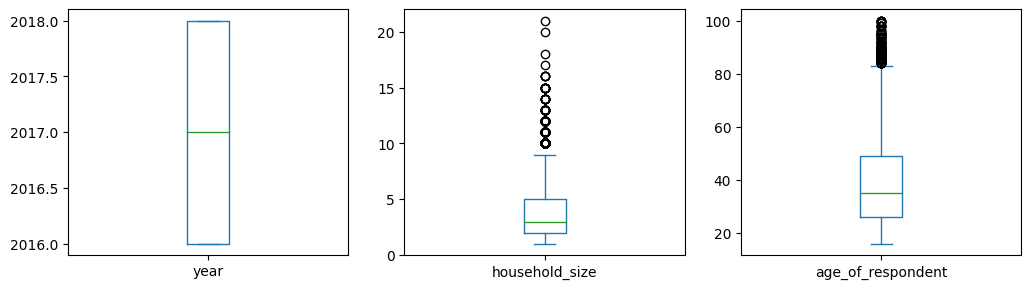

In [21]:
# Checking for Outliers without bank-account column

#Here only numrical columns can be shown --> only 3 columns to display.

df_cleaned.plot(kind='box', subplots=True, layout=(8,8), figsize=(34,30))
plt.show() 

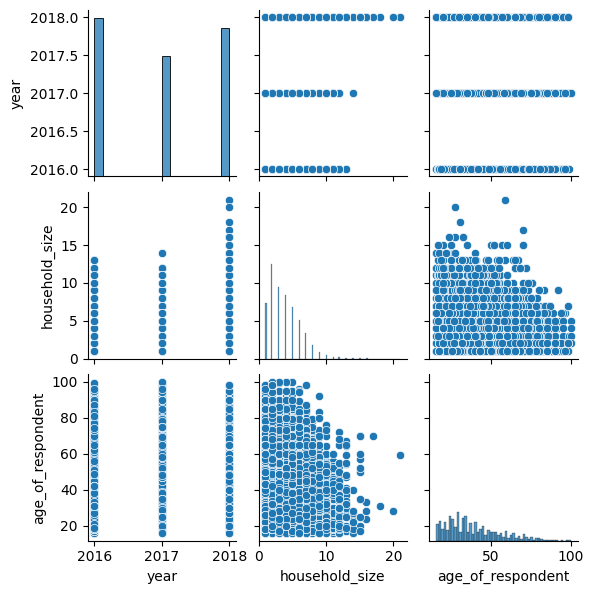

In [22]:
sns.pairplot(df_wo_target_nan, height=2,);

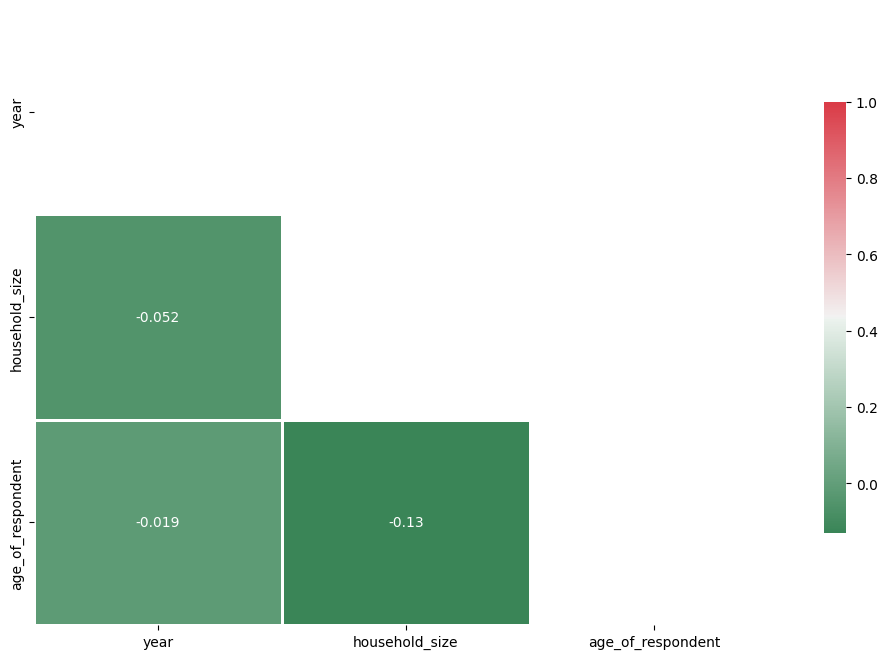

In [23]:
# Correlation heatmap

fig, ax = plt.subplots(figsize=(12,8))

# Create a new DataFrame that only includes the numerical variables
df_numeric = df_wo_target_nan.select_dtypes(include=['float64', 'int64'])

# Compute correlations
correlations = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(140, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=1, annot=True,
            linewidths=1, cbar_kws={"shrink": .7}, ax=ax);